In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv("../output/dataset_clean.csv")
data = data.drop(columns="Unnamed: 0")
data_rank = data.set_index("Rank")

In [80]:
def getSummary():
    lista_regiones= list(data_rank["Region"].value_counts().index)
    total = pd.DataFrame(columns = ["Rank","Region","Country","Score","Main contribution","Lower contribution", "Temp. (ºC)", "Precip./month (mm)"])
    for e in lista_regiones:
        data_region = data_rank[data_rank["Region"] == e]
        total = total.append({"Rank":getMin(data_region).index.values[0],"Region": e,
                              "Country":data_region["Country"][data_region["Country"].index == data_region.index.min()].values[0],
                              "Score":data_region["Score"][data_region["Country"]==data_region["Country"][data_region["Country"].index == data_region.index.min()].values[0]].values[0],
                              "Main contribution":getValueMax(getMin(data_region)),
                              "Lower contribution":getValueMin(getMin(data_region)),
                             "Temp. (ºC)":data_region["Temp. (ºC)"][data_region["Temp. (ºC)"].index == data_region.index.min()].values[0],
                             "Precip./month (mm)":data_region["Precip./month (mm)"][data_region["Precip./month (mm)"].index == data_region.index.min()].values[0]},
                             ignore_index=True)
        total = total.append({"Rank":getMax(data_region).index.values[0],"Region": e,
                              "Country":data_region["Country"][data_region["Country"].index == data_region.index.max()].values[0],
                              "Score":data_region["Score"][data_region["Country"]==data_region["Country"][data_region["Country"].index == data_region.index.max()].values[0]].values[0],
                              "Main contribution":getValueMax(getMax(data_region)),
                              "Lower contribution":getValueMin(getMax(data_region)),
                              "Temp. (ºC)":data_region["Temp. (ºC)"][data_region["Temp. (ºC)"].index == data_region.index.max()].values[0],
                             "Precip./month (mm)":data_region["Precip./month (mm)"][data_region["Precip./month (mm)"].index == data_region.index.max()].values[0]},
                              ignore_index=True)
    total = total.set_index(keys="Rank").sort_values("Rank")
    return total

def getMax(data_region):
    max_country=data_region[data_region.index == data_region.index.max()].drop(columns=['Score', 'Standard Error','Precip./month (mm)', 'Temp. (ºC)'])
    return max_country

def getMin(data_region):
    min_country=data_region[data_region.index == data_region.index.min()].drop(columns=['Score', 'Standard Error','Precip./month (mm)', 'Temp. (ºC)'])
    return min_country

def getValueMax(country):
    for e in country:
        if country[e].equals(country.max(axis=1,numeric_only=True)):
            return e
            #col_value = country[e].values[0]
    #return col
    
def getValueMin(country):
    for e in country:
        if country[e].equals(country.min(axis=1,numeric_only=True)):
            return e
            #col_value = country[e].values[0]
    #return col

In [139]:
display(getSummary())

,Region,Country,Score,Main contribution,Lower contribution,Temp. (ºC),Precip./month (mm)
Rank,,,,,,,
1,Western Europe,Switzerland,7.587,Economy,Generosity,6.75,125.06
5,North America,Canada,7.427,Economy,Trust in Government,-6.11,38.62
9,Australia and New Zealand,New Zealand,7.286,Family,Trust in Government,10.62,141.61
10,Australia and New Zealand,Australia,7.284,Economy,Trust in Government,21.50,46.35
11,Middle East and Northern Africa,Israel,7.278,Economy,Trust in Government,21.00,22.48
12,Latin America and Caribbean,Costa Rica,7.226,Family,Trust in Government,25.28,252.77
15,North America,United States,7.119,Economy,Trust in Government,7.36,57.76
24,Southeastern Asia,Singapore,6.798,Economy,Generosity,27.57,210.98
31,Central and Eastern Europe,Czech Republic,6.505,Family,Trust in Government,8.72,59.87


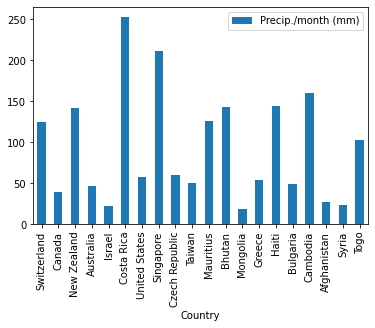

In [82]:
getSummary().set_index("Country").drop(columns=["Score","Temp. (ºC)"]).plot.bar()

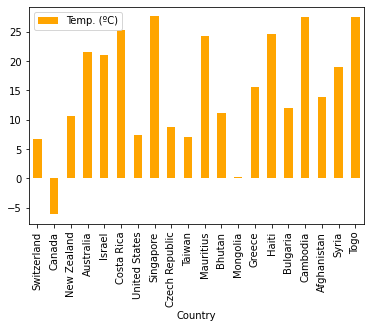

In [83]:
getSummary().set_index("Country").drop(columns=["Score","Precip./month (mm)"]).plot.bar(color = "Orange")

In [90]:
def analisis(region,income):
    if checkParams(region,income)!=None:
        return checkParams(region,income)
    if checkParams(region,income)==None:
        if income == None:
            data_analisis = data[data["Region"]==region]
        elif region == None:
            data_analisis = data[data["Income"]==income]
        else:
            data_region = data[data["Region"]==region] 
            data_analisis = data_region[data_region["Income"]==income]
    data_group = data_analisis.groupby(["Region","Income"]).agg({"Rank":["min","max"],"Country":"count","Score":["min","max"],
                                                      "Economy":"max","Family":"max",
                                                      "Health":"max","Freedom":"max",
                                                      "Trust in Government":"max","Generosity":"max",
                                                       "Precip./month (mm)":"max","Temp. (ºC)":"max"})

    return data_group.sort_values(("Rank","min"))

def checkParams(region,income):
    if region!=None:
        regions_list = list(data["Region"].value_counts().index)
        if region not in regions_list:
            return "Sorry.The value of region must be: Sub-Saharan Africa, Central and Eastern Europe, Latin America and Caribbean, Western Europe, Middle East and Northern Africa, Southeastern Asia, Southern Asia, Eastern Asia, North America, Australia and New Zealand."
        elif income!=None:
            data_region = data[data["Region"]==region]
            income_list = list(data_region["Income"].value_counts().index)
            if income not in income_list:    
                return f"Sorry. There are not countries with that income in that region. Possible incomes are: {income_list}"
    elif region==None and income:
        total_income = ["HIC","LIC","UMC","LMC"]
        if income not in total_income:
            return f"Sorry. The value of income must be: {total_income}"

In [142]:
analisis(region=None,income="UMC")

Rank      Country  Score         \
                                        min  max   count    min    max   
Region                          Income                                   
Latin America and Caribbean     UMC      12   98      13  4.885  7.226   
Southeastern Asia               UMC      34   61       2  5.770  6.455   
Eastern Asia                    UMC      38   84       2  5.140  6.298   
Central and Eastern Europe      UMC      54  134      15  4.218  5.855   
Middle East and Northern Africa UMC      63  112       7  4.677  5.754   
Sub-Saharan Africa              UMC      71  143       4  3.896  5.477   
Southern Asia                   UMC     132  132       1  4.271  4.271   

                                        Economy   Family   Health  Freedom  \
                                            max      max      max      max   
Region                          Income                                       
Latin America and Caribbean     UMC     1.05351  1.30477  0.86027  0.63376   
Southeastern Asia               UMC     1.12486  1.26504  0.73850  0.55664   
Eastern Asia                    UMC     1.29098  1.07617  0.87530  0.51697   
Central and Eastern Europe      UMC     1.13764  1.23617  0.81325  0.51649   
Middle East and Northern Africa UMC     1.13145  1.11862  0.83947  0.41668   
Sub-Saharan Africa              UMC     1.06024  1.18468  0.70950  0.56066   
Southern Asia                   UMC     0.83524  1.01905  0.70806  0.53726   

                                       Trust in Government Generosity  \
                                                       max        max   
Region                          Income                                  
Latin America and Caribbean     UMC                0.21312    0.34240   
Southeastern Asia               UMC                0.10501    0.57630   
Eastern Asia                    UMC                0.08129    0.25376   
Central and Eastern Europe      UMC                0.38331    0.28310   
Middle East and Northern Africa UMC                0.17383    0.38086   
Sub-Saharan Africa              UMC                0.12474    0.37744   
Southern Asia                   UMC                0.09179    0.40828   

                                       Precip./month (mm) Temp. (ºC)  
                                                      max        max  
Region                          Income                                
Latin America and Caribbean     UMC                252.77      26.13  
Southeastern Asia               UMC                278.70      26.45  
Eastern Asia                    UMC                 50.14       6.98  
Central and Eastern Europe      UMC                 95.57      15.69  
Middle East and Northern Africa UMC                 49.79      23.63  
Sub-Saharan Africa              UMC                158.22      25.19  
Southern Asia                   UMC                136.47      27.52

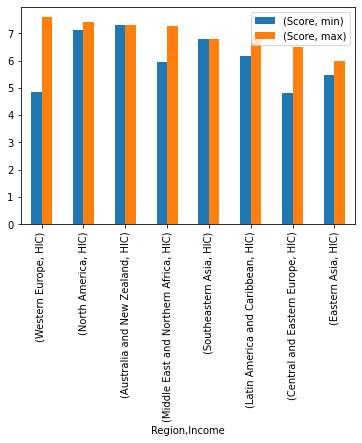

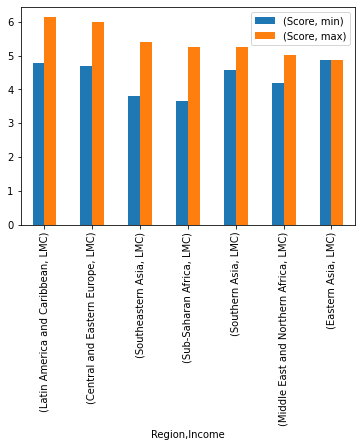

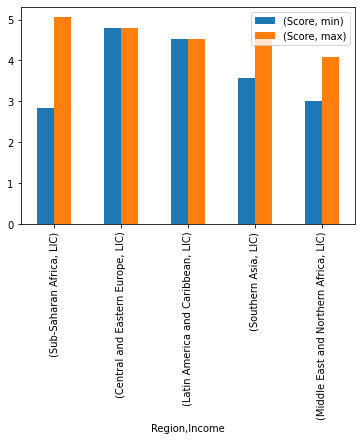

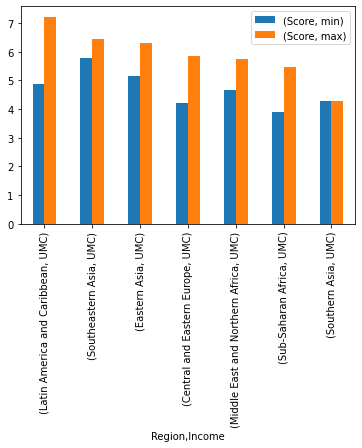

In [128]:
#solo incomes
lista_incomes=["HIC","LMC","LIC","UMC"]
for e in lista_incomes:
    analisis(region=None,income=e).drop(columns=["Country","Rank","Economy","Family","Health","Freedom","Trust in Government","Generosity",
                                                 "Precip./month (mm)","Temp. (ºC)"]).plot.bar().legend()

In [154]:
regions_list = list(data["Region"].value_counts().index)
for e in regions_list:
    display(analisis(region=e,income=None))
    break
# pongo break para que no salgan todas

Rank      Country  Score         Economy   Family  \
                           min  max   count    min    max      max      max   
Region             Income                                                     
Sub-Saharan Africa UMC      71  143       4  3.896  5.477  1.06024  1.18468   
                   LMC      78  151      16  3.655  5.268  0.75778  1.07284   
                   LIC      91  158      20  2.839  5.057  0.34193  1.13299   

                            Health  Freedom Trust in Government Generosity  \
                               max      max                 max        max   
Region             Income                                                    
Sub-Saharan Africa UMC     0.70950  0.56066             0.12474    0.37744   
                   LMC     0.43540  0.49309             0.28105    0.37542   
                   LIC     0.46721  0.59201             0.55191    0.50318   

                          Precip./month (mm) Temp. (ºC)  
                                         max        max  
Region             Income                                
Sub-Saharan Africa UMC                158.22      25.19  
                   LMC                135.46      28.67  
                   LIC                212.19      29.04

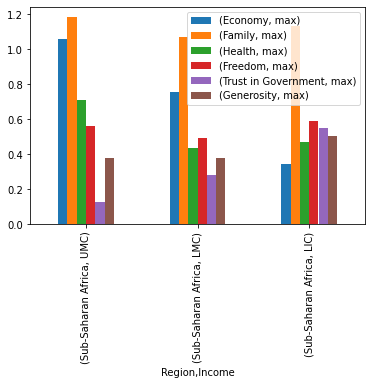

In [153]:
regions_list = list(data["Region"].value_counts().index)
for e in regions_list:
    analisis(region=e,income=None).sort_values(("Score","min"),ascending=False).drop(columns=["Rank","Country","Score","Precip./month (mm)","Temp. (ºC)"]).plot.bar().legend()
    break
# pongo break para que no salgan todas

In [152]:
regions_list = list(data["Region"].value_counts().index)
for e in regions_list:
    data_region = data[data["Region"]==e]
    list_income = data_region["Income"].value_counts().index
    for i in list_income:
        display(analisis(region=e,income=i))
        break
    break
# pongo los breaks para que no salgan todas

Rank      Country  Score         Economy   Family  \
                           min  max   count    min    max      max      max   
Region             Income                                                     
Sub-Saharan Africa LIC      91  158      20  2.839  5.057  0.34193  1.13299   

                            Health  Freedom Trust in Government Generosity  \
                               max      max                 max        max   
Region             Income                                                    
Sub-Saharan Africa LIC     0.46721  0.59201             0.55191    0.50318   

                          Precip./month (mm) Temp. (ºC)  
                                         max        max  
Region             Income                                
Sub-Saharan Africa LIC                212.19      29.04

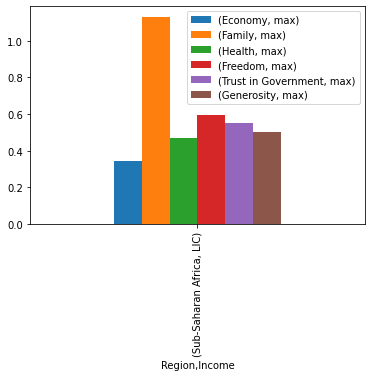

In [151]:
regions_list = list(data["Region"].value_counts().index)
for e in regions_list:
    data_region = data[data["Region"]==e]
    list_income = data_region["Income"].value_counts().index
    for i in list_income:
        analisis(region=e,income=i).drop(columns=["Rank","Country","Score","Precip./month (mm)","Temp. (ºC)"]).plot.bar().legend()
        break
    break
# pongo los breaks para que no salgan todas